In [1]:
import ours
import sys
sys.path.append("Normalized-Attention-Guidance")
import os

In [2]:
from src.pipeline_sd3_nag import NAGStableDiffusion3Pipeline
import torch
model_id = "stabilityai/stable-diffusion-3.5-large-turbo"
if "pipe" not in locals():
  pipe = NAGStableDiffusion3Pipeline.from_pretrained(
      model_id,
      torch_dtype=torch.bfloat16,
  )
pipe = pipe.to("cuda")
pipe.set_progress_bar_config(disable=True)

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

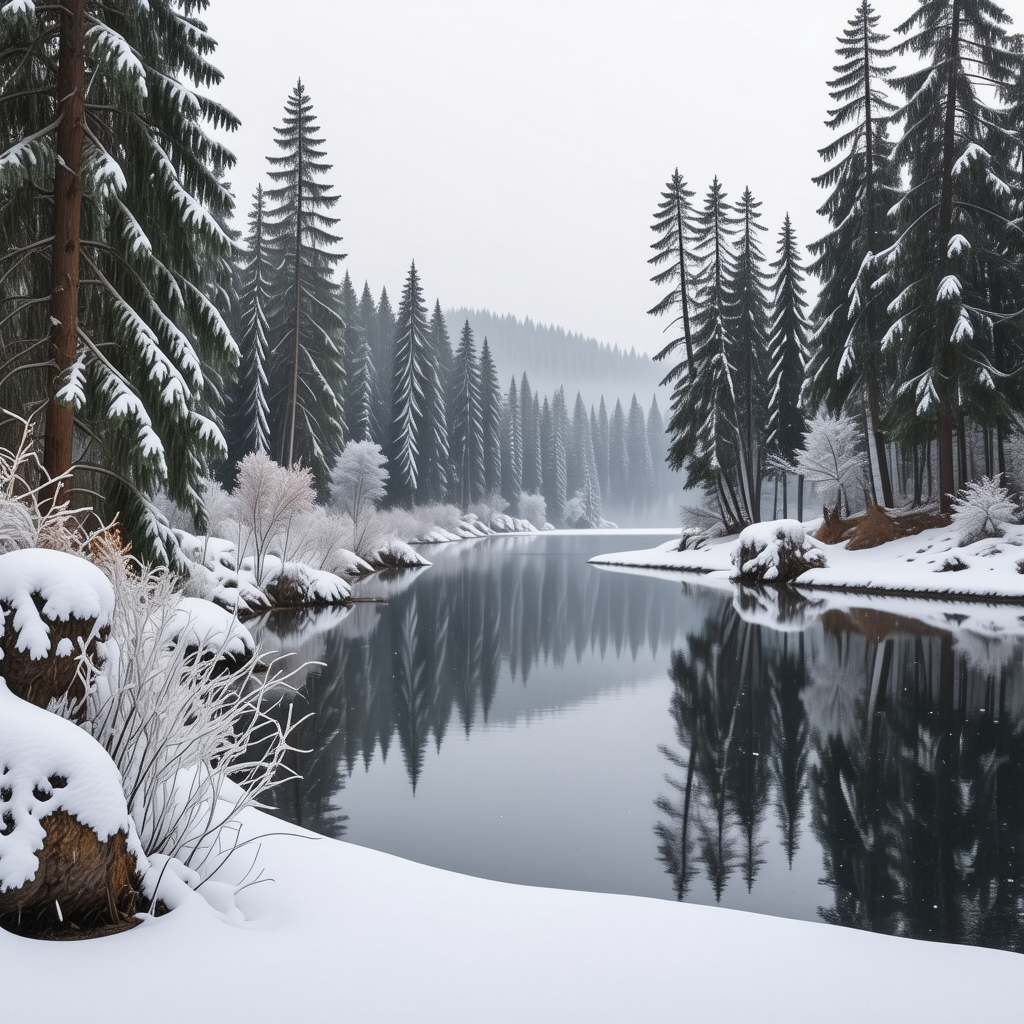

In [3]:
prompt = "Canadian winter landscape, high quality, 4k"
neg_prompt = "snow"

image_nag = pipe(
    prompt,
    nag_negative_prompt=neg_prompt,
    generator=torch.manual_seed(42),
    guidance_scale=0.,
    nag_scale=0,
    num_inference_steps=8,
).images[0]
image_nag

In [4]:
images = []
for scale in [0, 1, 2, 3]:
    images.append(ours.inference(pipe, prompt, neg_prompt, seed=42, scale=scale, offset=0.1))

In [5]:
from PIL import Image
import pylab

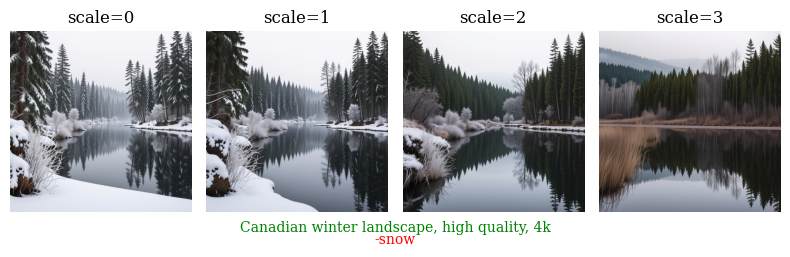

In [18]:
import matplotlib.pyplot as plt
pylab.figure(figsize=(8, 2.5))
for i in range(4):
    prompt = "Canadian winter landscape, high quality, 4k"
    neg_prompt = "snow"
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
    pylab.subplot(1, 4, i+1)
    pylab.imshow(images[i])
    pylab.axis("off")
    pylab.title(f"scale={i}")
pylab.tight_layout()
plt.gcf().text(0.5, 0.06, prompt, ha='center', color='green')
plt.gcf().text(0.5, 0.01, f"-{neg_prompt}", ha='center', color='red')
pylab.show()
